In [48]:
import requests
import pandas as pd
import numpy as np
import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [61]:
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])
        
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [51]:
spacex_url="https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)
response.status_code

200

In [52]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
data = pd.json_normalize(response.json())
#print(data.head())
year_first_row = pd.to_datetime(data.loc[0, 'static_fire_date_utc']).year
print("The year in the first row for 'static_fire_date_utc' is:", year_first_row)

The year in the first row for 'static_fire_date_utc' is: 2006


In [53]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]
# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]
# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0]).map(lambda x: x['core'])
data['payloads'] = data['payloads'].map(lambda x : x[0])
# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date
# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [62]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []
# Call getBoosterVersion
BoosterVersion
# Call getBoosterVersion
getBoosterVersion(data)

In [63]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [67]:
import requests
import pandas as pd
import numpy as np
import datetime

# Setting pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

def getBoosterVersion(data):
    for x in data['rocket']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
            BoosterVersion.append(response['name'])

def getLaunchSite(data):
    for x in data['launchpad']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
            Longitude.append(response['longitude'])
            Latitude.append(response['latitude'])
            LaunchSite.append(response['name'])

def getPayloadData(data):
    for load in data['payloads']:
        if load:
            response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
            PayloadMass.append(response['mass_kg'])
            Orbit.append(response['orbit'])

def getCoreData(data):
    for core_info in data['cores']:
        core_id = core_info['core']
        if core_id is not None:
            response = requests.get(f"https://api.spacexdata.com/v4/cores/{core_id}").json()
            Block.append(response.get('block'))
            ReusedCount.append(response.get('reuse_count'))
            Serial.append(response.get('serial'))
            Outcome.append(f"{response.get('landing_success')} {response.get('landing_type')}")
            Flights.append(response.get('flight'))
            GridFins.append(response.get('gridfins'))
            Reused.append(response.get('reused'))
            Legs.append(response.get('legs'))
            LandingPad.append(response.get('landpad'))
        else:
            Block.append(None)
            ReusedCount.append(None)
            Serial.append(None)
            Outcome.append(None)
            Flights.append(None)
            GridFins.append(None)
            Reused.append(None)
            Legs.append(None)
            LandingPad.append(None)

# Static JSON URL
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
data = pd.json_normalize(response.json())

# Display the year of the first row for 'static_fire_date_utc'
year_first_row = pd.to_datetime(data.loc[0, 'static_fire_date_utc']).year
print("The year in the first row for 'static_fire_date_utc' is:", year_first_row)

# Subset the dataframe
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]
data = data[data['cores'].map(len) == 1]
data = data[data['payloads'].map(len) == 1]
data['cores'] = data['cores'].map(lambda x: x[0])
data['payloads'] = data['payloads'].map(lambda x: x[0])
data['date'] = pd.to_datetime(data['date_utc']).dt.date
data = data[data['date'] <= datetime.date(2020, 11, 13)]

# Call functions to populate data
getBoosterVersion(data)
getLaunchSite(data)
getPayloadData(data)
getCoreData(data)

The year in the first row for 'static_fire_date_utc' is: 2006


In [69]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}
launch_df = pd.DataFrame(launch_dict)

# Show the summary of the DataFrame
print(launch_df.info())

# Show the head of the DataFrame
print(launch_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    94 non-null     int64  
 1   Date            94 non-null     object 
 2   BoosterVersion  94 non-null     object 
 3   PayloadMass     88 non-null     float64
 4   Orbit           94 non-null     object 
 5   LaunchSite      94 non-null     object 
 6   Outcome         94 non-null     object 
 7   Flights         0 non-null      object 
 8   GridFins        0 non-null      object 
 9   Reused          0 non-null      object 
 10  Legs            0 non-null      object 
 11  LandingPad      0 non-null      object 
 12  Block           90 non-null     float64
 13  ReusedCount     94 non-null     int64  
 14  Serial          94 non-null     object 
 15  Longitude       94 non-null     float64
 16  Latitude        94 non-null     float64
dtypes: float64(4), int64(2), object(11)
m

In [70]:
# Filter the data to only keep the Falcon 9 launches
data_falcon9 = launch_df[launch_df['BoosterVersion'] != 'Falcon 1']

# Print the number of Falcon 9 launches
num_falcon9_launches = data_falcon9.shape[0]
print(f"Number of Falcon 9 launches: {num_falcon9_launches}")

# Display the head of the filtered DataFrame
print(data_falcon9.head())

Number of Falcon 9 launches: 90
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4             6  2010-06-04       Falcon 9          NaN   LEO  CCSFS SLC 40   
5             8  2012-05-22       Falcon 9        525.0   LEO  CCSFS SLC 40   
6            10  2013-03-01       Falcon 9        677.0   ISS  CCSFS SLC 40   
7            11  2013-09-29       Falcon 9        500.0    PO   VAFB SLC 4E   
8            12  2013-12-03       Falcon 9       3170.0   GTO  CCSFS SLC 40   

     Outcome Flights GridFins Reused  Legs LandingPad  Block  ReusedCount  \
4  None None    None     None   None  None       None    1.0            0   
5  None None    None     None   None  None       None    1.0            0   
6  None None    None     None   None  None       None    1.0            0   
7  None None    None     None   None  None       None    1.0            0   
8  None None    None     None   None  None       None    1.0            0   

  Serial   Longitude   Latitud

In [71]:
# Filter the data to only keep the Falcon 9 launches
data_falcon9 = launch_df[launch_df['BoosterVersion'] != 'Falcon 1']

# Reset the FlightNumber column
data_falcon9.loc[:, 'FlightNumber'] = list(range(1, data_falcon9.shape[0] + 1))

# Check for missing values
missing_values = data_falcon9.isnull().sum()

# Print the missing values for all columns
print("Missing values for each column:\n", missing_values)

# Print the number of missing values for the LandingPad column
missing_landingpad = missing_values['LandingPad']
print(f"Number of missing values in the LandingPad column: {missing_landingpad}")

# Display the head of the filtered DataFrame
print(data_falcon9.head())

Missing values for each column:
 FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights           90
GridFins          90
Reused            90
Legs              90
LandingPad        90
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64
Number of missing values in the LandingPad column: 90
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4             1  2010-06-04       Falcon 9          NaN   LEO  CCSFS SLC 40   
5             2  2012-05-22       Falcon 9        525.0   LEO  CCSFS SLC 40   
6             3  2013-03-01       Falcon 9        677.0   ISS  CCSFS SLC 40   
7             4  2013-09-29       Falcon 9        500.0    PO   VAFB SLC 4E   
8             5  2013-12-03       Falcon 9       3170.0   GTO  CCSFS SLC 40   

     Outcome Flights GridFins Reused  Legs LandingPad  Block  Reused

In [41]:
import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [42]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    

In [46]:
# Function to extract column names from the header
def extract_column_from_header(th):
    return th.text.strip()

# URL for the Falcon 9 launch history Wikipedia page
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

# Perform an HTTP GET request
response = requests.get(static_url)

# Check if the request was successful
if response.status_code == 200:
    # Create a BeautifulSoup object from the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all tables in the HTML
    html_tables = soup.find_all('table')
    
    # Access the third table, which contains the launch records
    first_launch_table = html_tables[2]
    print(first_launch_table)  # For verification, you might want to limit how much you print in a real scenario

    # Extract column names from the table headers
    column_names = [extract_column_from_header(th) for th in first_launch_table.find_all('th')]
    print(column_names)
else:
    print("Failed to retrieve data")

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11">[b]</a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12">[c]</a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 9 first-stage landing tests">Booster<br/>landing</a>
</th></tr>
<tr>
<th rowspan="2" scope="row" style="text-align:center;">1
</th>
<td>

In [90]:
import requests
import pandas as pd
import numpy as np
import io
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
# URL of the CSV file
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# Fetch the CSV file using requests
response = requests.get(URL)
dataset_part_2_csv = io.BytesIO(response.content)
# Read the CSV file into a DataFrame
df = pd.read_csv(dataset_part_2_csv)
# Print the first 5 rows of the DataFrame
print(df.head(5))
# Using the previously filtered data_falcon9 DataFrame
# Reset the FlightNumber column
data_falcon9.loc[:, 'FlightNumber'] = list(range(1, data_falcon9.shape[0] + 1))

# Check for missing values
missing_values = data_falcon9.isnull().sum()

# Print the missing values for all columns
print("\nMissing values for each column:\n", missing_values)

# Print the number of missing values for the LandingPad column
missing_landingpad = missing_values['LandingPad']
print(f"\nNumber of missing values in the LandingPad column: {missing_landingpad}")

# Display the head of the filtered DataFrame
print("\nFirst 5 rows of the filtered Falcon 9 DataFrame:")
print(data_falcon9.head())

# Add the Class column from the original dataframe
data_falcon9['Class'] = df['Class']

# Print column names to verify
print("\nColumn names of the filtered Falcon 9 DataFrame:")
print(data_falcon9.columns)

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

C:\Users\Jerry Hunter\AppData\Local\Temp\ipykernel_21528\3897383957.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9['Class'] = df['Class']


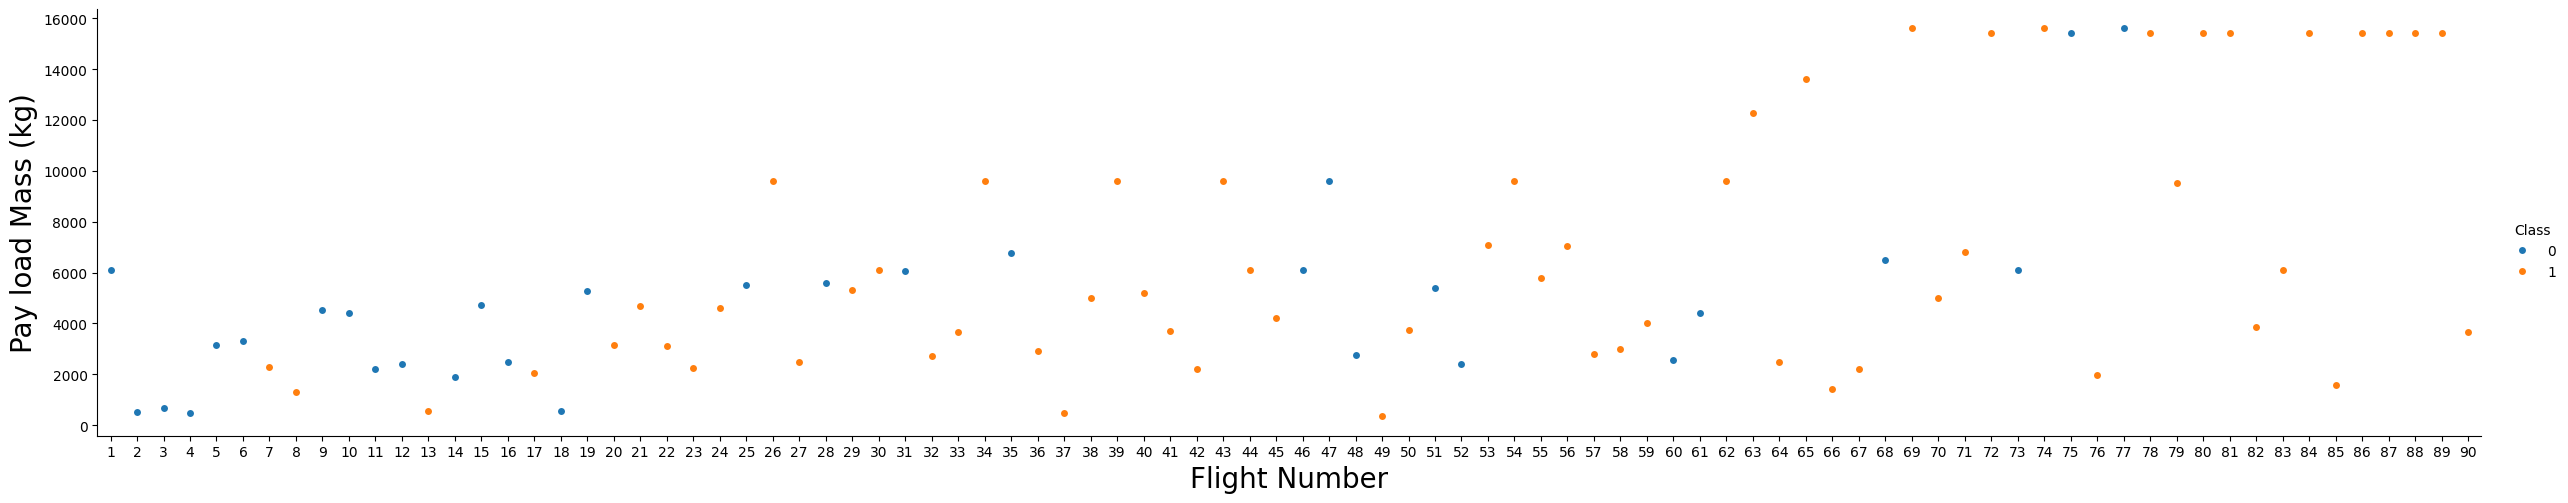

In [95]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [96]:
print(data_falcon9.columns)

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

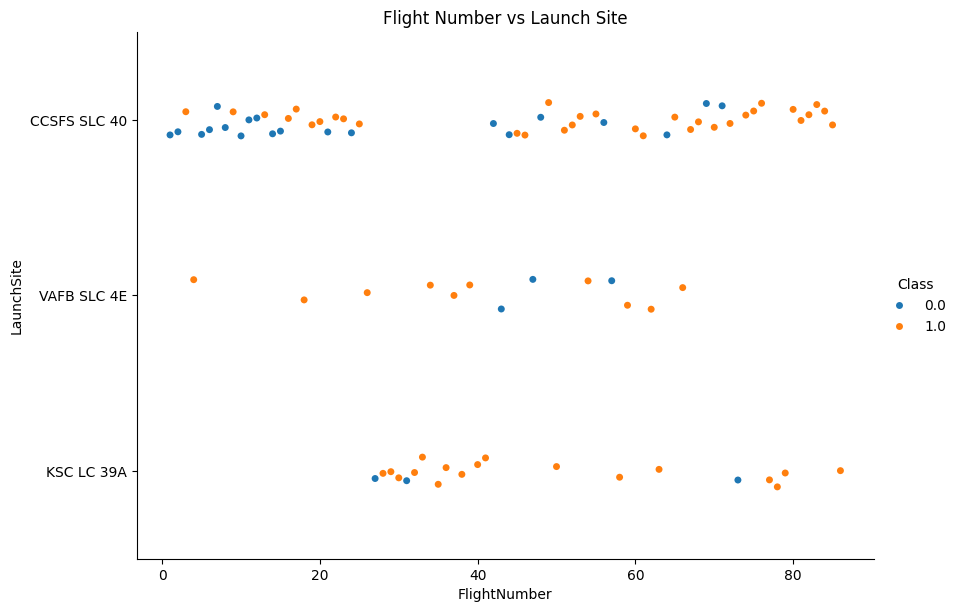

In [97]:
# TASK 1: Visualize the relationship between Flight Number and Launch Site
plt.figure(figsize=(10, 6))
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=data_falcon9, kind='strip', height=6, aspect=1.5)
plt.title('Flight Number vs Launch Site')
plt.show()

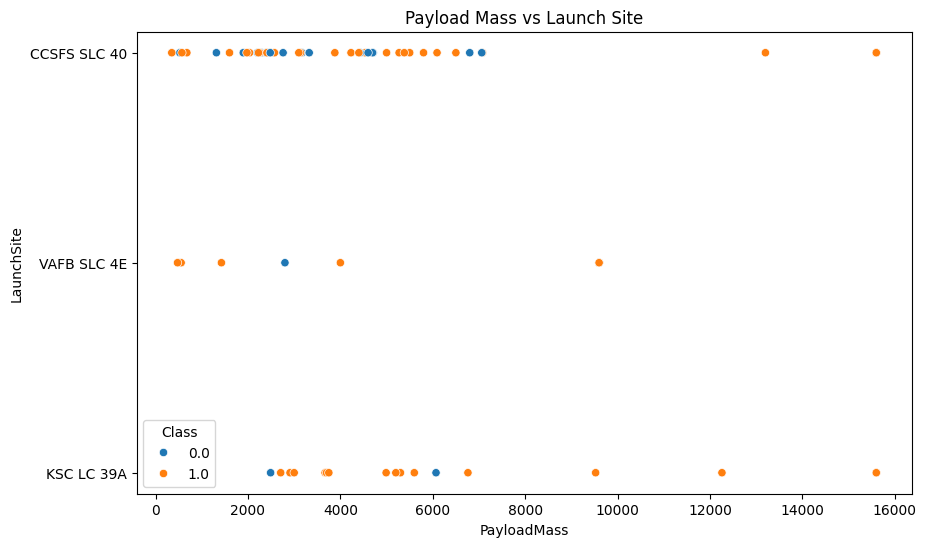

In [98]:
# TASK 2: Visualize the relationship between Payload and Launch Site
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=data_falcon9)
plt.title('Payload Mass vs Launch Site')
plt.show()

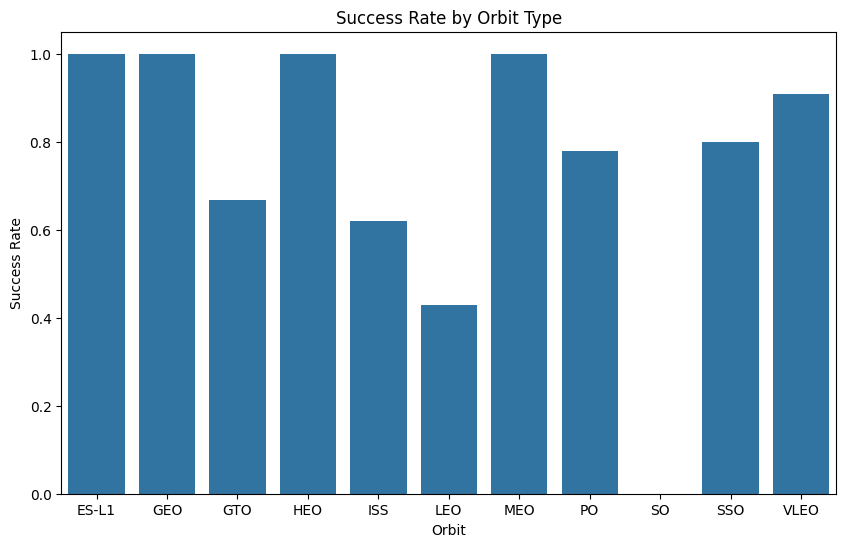

In [99]:
# TASK 3: Visualize the relationship between success rate of each orbit type
orbit_success_rate = data_falcon9.groupby('Orbit')['Class'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate)
plt.title('Success Rate by Orbit Type')
plt.ylabel('Success Rate')
plt.show()

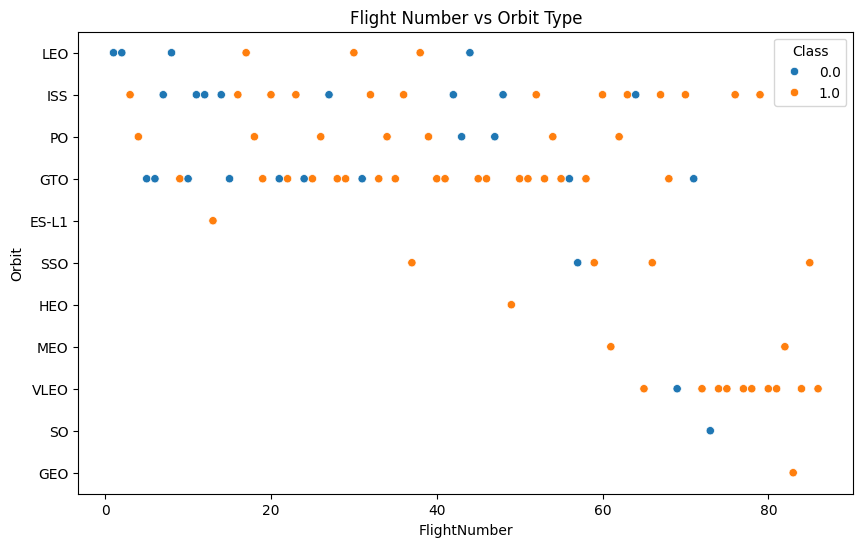

In [100]:
# TASK 4: Visualize the relationship between Flight Number and Orbit type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=data_falcon9)
plt.title('Flight Number vs Orbit Type')
plt.show()

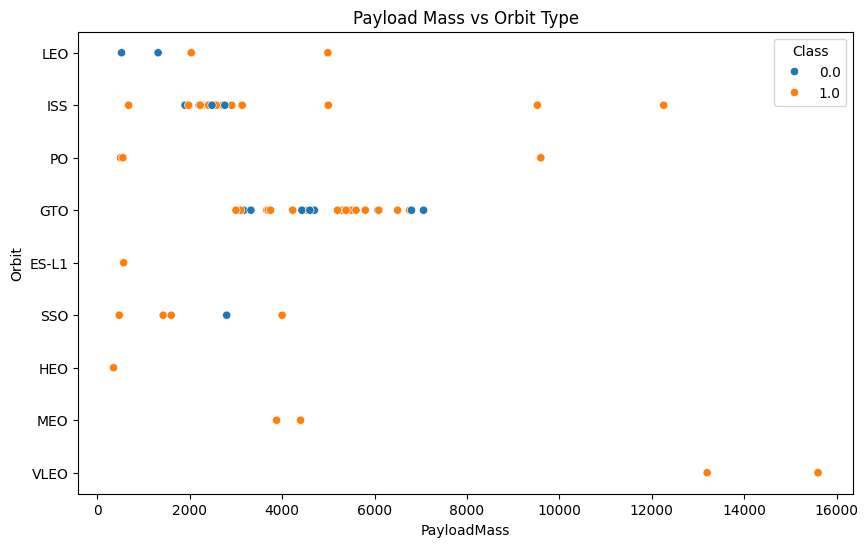

In [101]:
# TASK 5: Visualize the relationship between Payload and Orbit type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=data_falcon9)
plt.title('Payload Mass vs Orbit Type')
plt.show()

C:\Users\Jerry Hunter\AppData\Local\Temp\ipykernel_21528\3137004594.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9['Year'] = Extract_year(data_falcon9['Date'])


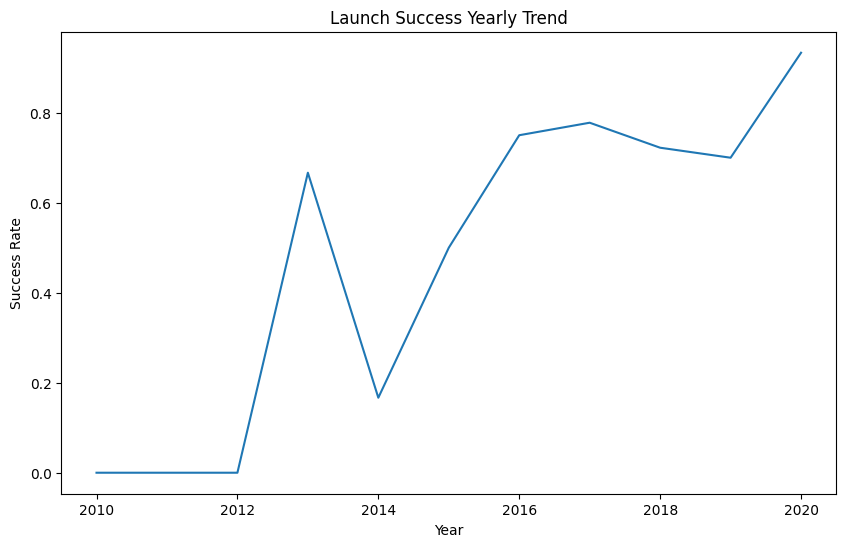

In [104]:
# TASK 6: Visualize the launch success yearly trend
# Extract years from the date
def Extract_year(date_series):
    return date_series.apply(lambda x: x.year)

data_falcon9['Year'] = Extract_year(data_falcon9['Date'])

# Group by year and calculate the mean success rate
yearly_success_rate = data_falcon9.groupby('Year')['Class'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Class', data=yearly_success_rate)
plt.title('Launch Success Yearly Trend')
plt.ylabel('Success Rate')
plt.show()

In [105]:
# Select the relevant features
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
# Create dummy variables for categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
# Display the results using the head method
print(features_one_hot.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  \
0            0        False      False      False      False      False   
1            0        False      False      False      False      False   
2            0        False      False      False      False       True   
3            0        False      False      False      False      False   
4            0        False      False       True      False      False   

   Orbit_LEO  Orbit_MEO  Orbit_PO  Orbit_SO  Orbit_SSO  Orbit_VLEO  \
0       True      False     False     Fa

In [110]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon
import io

In [112]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
response = requests.get(URL)
spacex_csv_file = io.BytesIO(response.content)
spacex_df=pd.read_csv(spacex_csv_file)
spacex_df.head(5)
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [ ]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label

In [113]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon
import requests
import io

# Load the data
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
response = requests.get(URL)
spacex_csv_file = io.BytesIO(response.content)
spacex_df = pd.read_csv(spacex_csv_file)
spacex_df.head(5)
# Select relevant sub-columns
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
# Create a new column for marker colors based on the class value
spacex_df['marker_color'] = spacex_df['class'].apply(lambda x: 'green' if x == 1 else 'red')
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
# Initialize the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(site_map)
# Add markers to the cluster
for index, record in spacex_df.iterrows():
    marker = folium.Marker(
        location=[record['Lat'], record['Long']],
        icon=folium.Icon(color=record['marker_color']),
        popup=f"Launch Site: {record['Launch Site']}\nSuccess: {record['class']}"
    )
    marker_cluster.add_child(marker)
# Add the marker cluster to the map
site_map.add_child(marker_cluster)
# Display the map
site_map

In [115]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6373.0  # approximate radius of earth in km

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)
site_map.add_child(mouse_position)
# Example coordinates for the closest coastline
coastline_lat = 28.56367
coastline_lon = -80.57163
# Example launch site coordinates
launch_site_lat = 28.573255
launch_site_lon = -80.646895
# Calculate the distance to the coastline
distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)
# Create and add a marker on the closest coastline point on the map
distance_marker = folium.Marker(
    location=[coastline_lat, coastline_lon],
    icon=DivIcon(
        icon_size=(20, 20),
        icon_anchor=(0, 0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_coastline),
    )
)
site_map.add_child(distance_marker)
# Draw a PolyLine between the launch site and the closest coastline point
lines = folium.PolyLine(locations=[[launch_site_lat, launch_site_lon], [coastline_lat, coastline_lon]], weight=1)
site_map.add_child(lines)
# Display the map
site_map

In [119]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"

# Load the data
spacex_df = pd.read_csv(url)

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1('SpaceX Launch Records Dashboard',
            style={'textAlign': 'center', 'color': '#503D36',
                   'font-size': 40}),
    dcc.Dropdown(id='site-dropdown',
                 options=[
                     {'label': 'All Sites', 'value': 'ALL'},
                     {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                     {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                     {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                     {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
                 ],
                 value='ALL',
                 placeholder="Select a Launch Site here",
                 searchable=True
                 ),
    html.Br(),
    dcc.Graph(id='success-pie-chart'),
    html.Br(),
    html.P("Payload range (Kg):"),
    dcc.RangeSlider(id='payload-slider',
                    min=0, max=10000, step=1000,
                    marks={0: '0', 1000: '1000', 2000: '2000', 3000: '3000', 4000: '4000',
                           5000: '5000', 6000: '6000', 7000: '7000', 8000: '8000', 9000: '9000', 10000: '10000'},
                    value=[0, 10000]
                    ),
    html.Br(),
    dcc.Graph(id='success-payload-scatter-chart'),
])

### TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown

@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(filtered_df, values='class',
                     names='Launch Site',
                     title='Total Success Launches By Site')
        return fig
    else:
        filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site]
        filtered_df = filtered_df.groupby(['Launch Site', 'class']).size().reset_index(name='count')
        fig = px.pie(filtered_df, values='count',
                     names='class',
                     title=f'Total Success Launches for site {entered_site}')
        return fig
### TASK 3: Add a Range Slider to Select Payload

# The RangeSlider component is already added in the layout above.
# It has the id 'payload-slider'.

### TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot

@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value'),
     Input(component_id='payload-slider', component_property='value')])
def update_scatter_chart(entered_site, payload_range):
    low, high = payload_range
    filtered_df = spacex_df[(spacex_df['Payload Mass (kg)'] >= low) &
                            (spacex_df['Payload Mass (kg)'] <= high)]
    if entered_site == 'ALL':
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class',
                         color='Booster Version Category',
                         title='Correlation between Payload and Success for all Sites')
        return fig
    else:
        filtered_df = filtered_df[filtered_df['Launch Site'] == entered_site]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class',
                         color='Booster Version Category',
                         title=f'Correlation between Payload and Success for site {entered_site}')
        return fig

if __name__ == '__main__':
    app.run_server(debug=True)

In [126]:
import csv
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Load the SpaceX data into a pandas DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")

# Write the DataFrame to the SQLite database
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Create a new table SPACEXTABLE with non-null Date entries using a standard SQL command
cur.execute("""
CREATE TABLE SPACEXTABLE AS
SELECT * FROM SPACEXTBL
WHERE Date IS NOT NULL
""")

# Commit the changes and close the connection
con.commit()
con.close()

OperationalError: table SPACEXTABLE already exists

In [127]:
# Task 1: Display the names of the unique launch sites in the space mission
query1 = "SELECT DISTINCT `Launch_Site` FROM SPACEXTABLE"
cur.execute(query1)
launch_sites = cur.fetchall()
print("Unique Launch Sites:", launch_sites)

con.close()

Unique Launch Sites: [('CCAFS LC-40',), ('VAFB SLC-4E',), ('KSC LC-39A',), ('CCAFS SLC-40',)]


In [128]:
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Task 2: Display 5 records where launch sites begin with the string 'CCA'
query2 = "SELECT * FROM SPACEXTABLE WHERE `Launch_Site` LIKE 'CCA%' LIMIT 5"
cur.execute(query2)
cca_records = cur.fetchall()
print("Records with Launch Sites starting with 'CCA':", cca_records)

con.close()

Records with Launch Sites starting with 'CCA': [('2010-06-04', '18:45:00', 'F9 v1.0  B0003', 'CCAFS LC-40', 'Dragon Spacecraft Qualification Unit', 0, 'LEO', 'SpaceX', 'Success', 'Failure (parachute)'), ('2010-12-08', '15:43:00', 'F9 v1.0  B0004', 'CCAFS LC-40', 'Dragon demo flight C1, two CubeSats, barrel of Brouere cheese', 0, 'LEO (ISS)', 'NASA (COTS) NRO', 'Success', 'Failure (parachute)'), ('2012-05-22', '7:44:00', 'F9 v1.0  B0005', 'CCAFS LC-40', 'Dragon demo flight C2', 525, 'LEO (ISS)', 'NASA (COTS)', 'Success', 'No attempt'), ('2012-10-08', '0:35:00', 'F9 v1.0  B0006', 'CCAFS LC-40', 'SpaceX CRS-1', 500, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt'), ('2013-03-01', '15:10:00', 'F9 v1.0  B0007', 'CCAFS LC-40', 'SpaceX CRS-2', 677, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt')]


In [129]:
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Task 3: Display the total payload mass carried by boosters launched by NASA (CRS)
query3 = "SELECT SUM(`PAYLOAD_MASS__KG_`) FROM SPACEXTABLE WHERE `Mission_Outcome` LIKE 'Success (NASA (CRS))%'"
cur.execute(query3)
total_payload_nasa = cur.fetchone()[0]
print("Total Payload Mass carried by NASA (CRS) boosters:", total_payload_nasa)

con.close()

Total Payload Mass carried by NASA (CRS) boosters: None


In [130]:
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Task 4: Display average payload mass carried by booster version F9 v1.1
query4 = "SELECT AVG(`PAYLOAD_MASS__KG_`) FROM SPACEXTABLE WHERE `Booster_Version` = 'F9 v1.1'"
cur.execute(query4)
avg_payload_f9_v1_1 = cur.fetchone()[0]
print("Average Payload Mass carried by F9 v1.1 boosters:", avg_payload_f9_v1_1)

con.close()

Average Payload Mass carried by F9 v1.1 boosters: 2928.4


In [131]:
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Task 5: List the date when the first successful landing outcome in ground pad was achieved
query5 = "SELECT MIN(Date) FROM SPACEXTABLE WHERE `Landing_Outcome` = 'Success (ground pad)'"
cur.execute(query5)
first_success_ground_pad = cur.fetchone()[0]
print("Date of first successful landing on ground pad:", first_success_ground_pad)

con.close()

Date of first successful landing on ground pad: 2015-12-22


In [132]:
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Task 6: List the names of the boosters with success in drone ship and payload mass between 4000 and 6000
query6 = """SELECT Booster_Version FROM SPACEXTABLE 
            WHERE `Landing_Outcome` = 'Success (drone ship)' 
            AND `PAYLOAD_MASS__KG_` > 4000 
            AND `PAYLOAD_MASS__KG_` < 6000"""
cur.execute(query6)
boosters_success_drone_ship = cur.fetchall()
print("Boosters with success on drone ship and payload mass between 4000 and 6000:", boosters_success_drone_ship)

con.close()

Boosters with success on drone ship and payload mass between 4000 and 6000: [('F9 FT B1022',), ('F9 FT B1026',), ('F9 FT  B1021.2',), ('F9 FT  B1031.2',)]


In [133]:
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Task 7: List the total number of successful and failure mission outcomes
query7 = """SELECT Mission_Outcome, COUNT(*) FROM SPACEXTABLE 
            GROUP BY Mission_Outcome"""
cur.execute(query7)
mission_outcomes = cur.fetchall()
print("Total number of successful and failure mission outcomes:", mission_outcomes)

con.close()

Total number of successful and failure mission outcomes: [('Failure (in flight)', 1), ('Success', 98), ('Success ', 1), ('Success (payload status unclear)', 1)]


In [134]:
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Task 8: List the names of the booster_versions which have carried the maximum payload mass
query8 = """SELECT Booster_Version FROM SPACEXTABLE 
            WHERE `PAYLOAD_MASS__KG_` = (
                SELECT MAX(`PAYLOAD_MASS__KG_`) FROM SPACEXTABLE
            )"""
cur.execute(query8)
boosters_max_payload = cur.fetchall()
print("Boosters with maximum payload mass:", boosters_max_payload)

con.close()

Boosters with maximum payload mass: [('F9 B5 B1048.4',), ('F9 B5 B1049.4',), ('F9 B5 B1051.3',), ('F9 B5 B1056.4',), ('F9 B5 B1048.5',), ('F9 B5 B1051.4',), ('F9 B5 B1049.5',), ('F9 B5 B1060.2 ',), ('F9 B5 B1058.3 ',), ('F9 B5 B1051.6',), ('F9 B5 B1060.3',), ('F9 B5 B1049.7 ',)]


In [135]:
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Task 9: List records with month names, failure landing outcomes in drone ship, booster versions, launch site for the months in year 2015
query9 = """SELECT strftime('%m', Date) AS Month, Landing_Outcome, Booster_Version, Launch_Site 
            FROM SPACEXTABLE 
            WHERE Landing_Outcome = 'Failure (drone ship)' 
            AND strftime('%Y', Date) = '2015'"""
cur.execute(query9)
records_2015_failure_drone_ship = cur.fetchall()
print("Records with failure landing outcomes in drone ship for 2015:", records_2015_failure_drone_ship)

con.close()

Records with failure landing outcomes in drone ship for 2015: [('01', 'Failure (drone ship)', 'F9 v1.1 B1012', 'CCAFS LC-40'), ('04', 'Failure (drone ship)', 'F9 v1.1 B1015', 'CCAFS LC-40')]


In [136]:
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Task 10: Rank the count of landing outcomes between 2010-06-04 and 2017-03-20
query10 = """SELECT Landing_Outcome, COUNT(*) as Outcome_Count 
             FROM SPACEXTABLE 
             WHERE Date BETWEEN '2010-06-04' AND '2017-03-20'
             GROUP BY Landing_Outcome 
             ORDER BY Outcome_Count DESC"""
cur.execute(query10)
landing_outcome_ranking = cur.fetchall()
print("Rank of landing outcomes between 2010-06-04 and 2017-03-20:", landing_outcome_ranking)

con.close()

Rank of landing outcomes between 2010-06-04 and 2017-03-20: [('No attempt', 10), ('Success (drone ship)', 5), ('Failure (drone ship)', 5), ('Success (ground pad)', 3), ('Controlled (ocean)', 3), ('Uncontrolled (ocean)', 2), ('Failure (parachute)', 2), ('Precluded (drone ship)', 1)]


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [149]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

In [143]:
import requests
import pandas as pd
import io

# Load dataset_part_2.csv
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response1 = requests.get(URL1)
data = pd.read_csv(io.BytesIO(response1.content))
print(data.head())

# Load dataset_part_3.csv
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response2 = requests.get(URL2)
X = pd.read_csv(io.BytesIO(response2.content))
print(X.head(100))

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [144]:
# Task 1
Y = data['Class'].to_numpy()
print(Y)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [145]:
from sklearn.preprocessing import StandardScaler
# Task 2
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
print(X.head())

   FlightNumber   PayloadMass   Flights     Block  ReusedCount  Orbit_ES-L1  \
0     -1.712912 -1.948145e-16 -0.653913 -1.575895     -0.97344       -0.106   
1     -1.674419 -1.195232e+00 -0.653913 -1.575895     -0.97344       -0.106   
2     -1.635927 -1.162673e+00 -0.653913 -1.575895     -0.97344       -0.106   
3     -1.597434 -1.200587e+00 -0.653913 -1.575895     -0.97344       -0.106   
4     -1.558942 -6.286706e-01 -0.653913 -1.575895     -0.97344       -0.106   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  Orbit_LEO  Orbit_MEO  Orbit_PO  \
0     -0.106  -0.654654     -0.106  -0.551677   3.443420  -0.185695 -0.333333   
1     -0.106  -0.654654     -0.106  -0.551677   3.443420  -0.185695 -0.333333   
2     -0.106  -0.654654     -0.106   1.812654  -0.290409  -0.185695 -0.333333   
3     -0.106  -0.654654     -0.106  -0.551677  -0.290409  -0.185695  3.000000   
4     -0.106   1.527525     -0.106  -0.551677  -0.290409  -0.185695 -0.333333   

   Orbit_SO  Orbit_SSO  Orbit_VLEO  La

In [146]:
from sklearn.model_selection import train_test_split
# Task 3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}, Y_test shape: {Y_test.shape}")

X_train shape: (72, 83), X_test shape: (18, 83)
Y_train shape: (72,), Y_test shape: (18,)


In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Task 4
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)

Tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8464285714285713


Test set accuracy: 0.8333333333333334


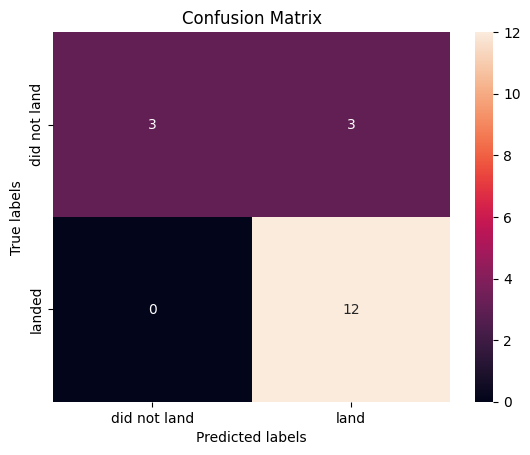

In [177]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
# Task 5
yhat = logreg_cv.predict(X_test)
accuracy = logreg_cv.score(X_test, Y_test)
print("Test set accuracy:", accuracy)
# Plot confusion matrix
plot_confusion_matrix(Y_test,yhat)

In [178]:
from sklearn.svm import SVC

# Task 6
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': np.logspace(-3, 3, 5), 'gamma': np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)

Tuned hyperparameters (best parameters): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


Test set accuracy: 0.8333333333333334


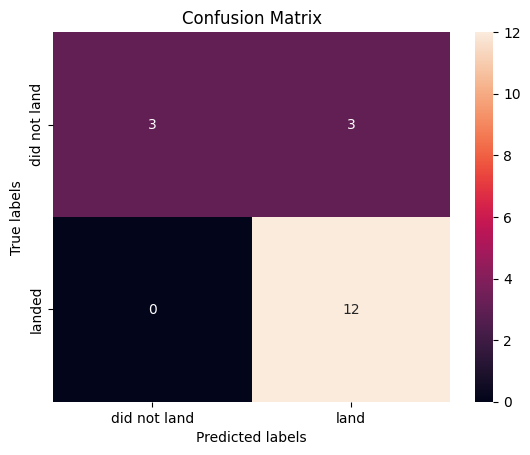

In [179]:
# Task 7: Calculate the accuracy on the test data and plot the confusion matrix
yhat_svm = svm_cv.predict(X_test)
accuracy_svm = svm_cv.score(X_test, Y_test)
print("Test set accuracy:", accuracy_svm)

# Plot confusion matrix for SVM
plot_confusion_matrix(Y_test,yhat)

In [180]:
from sklearn.tree import DecisionTreeClassifier

# Task 8
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)

Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy: 0.8714285714285713


c:\Users\Jerry Hunter\Desktop\mypython\Alpha\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jerry Hunter\Desktop\mypython\Alpha\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Jerry Hunter\Desktop\mypython\Alpha\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Jerry Hunter\Desktop\mypython\Alpha\.venv\Lib\site-packages\sklearn\base.py", line 6

Test set accuracy: 0.8333333333333334


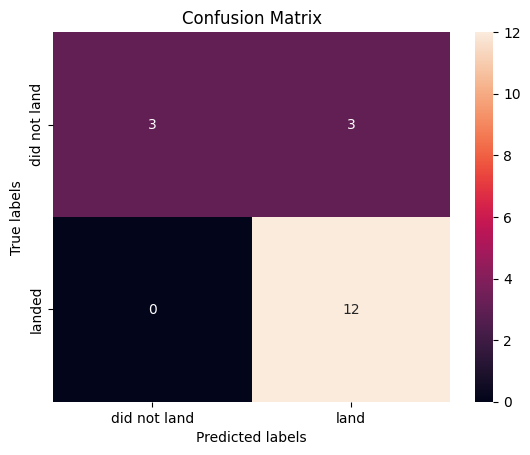

In [181]:
# Task 9: Calculate the accuracy of tree_cv on the test data and plot the confusion matrix
yhat_tree = tree_cv.predict(X_test)
accuracy_tree = tree_cv.score(X_test, Y_test)
print("Test set accuracy:", accuracy_tree)

# Plot confusion matrix for Decision Tree
# Plot confusion matrix
plot_confusion_matrix(Y_test,yhat)

In [182]:
from sklearn.neighbors import KNeighborsClassifier

# Task 10
parameters = {'n_neighbors': list(range(1, 11)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)

Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy: 0.8482142857142858


Test set accuracy: 0.8333333333333334


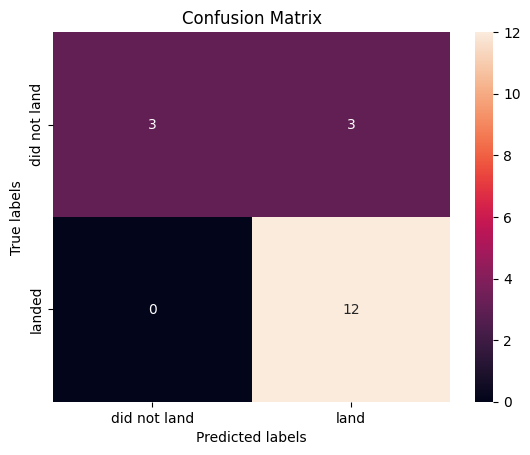

In [183]:
# Task 11
yhat = knn_cv.predict(X_test)
accuracy = knn_cv.score(X_test, Y_test)
print("Test set accuracy:", accuracy)
# Plot confusion matrix for Decision Tree
# Plot confusion matrix
plot_confusion_matrix(Y_test,yhat)

In [172]:
import requests
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
# Load dataset_part_2.csv
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response1 = requests.get(URL1)
data = pd.read_csv(io.BytesIO(response1.content))
# Load dataset_part_3.csv
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response2 = requests.get(URL2)
X = pd.read_csv(io.BytesIO(response2.content))
# Task 1: Create a NumPy array from the column Class in data
Y = data['Class'].to_numpy()
from sklearn import preprocessing
# Task 2: Standardize the data in X
transform = preprocessing.StandardScaler().fit(X)
X = transform.transform(X)
# Task 3: Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}, Y_test shape: {Y_test.shape}")
print(Y_test.shape)

X_train shape: (72, 83), X_test shape: (18, 83)
Y_train shape: (72,), Y_test shape: (18,)
(18,)


tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713
Test set accuracy: 0.8333333333333334


c:\Users\Jerry Hunter\Desktop\mypython\Alpha\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

c:\Users\Jerry Hunter\Desktop\mypython\Alpha\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



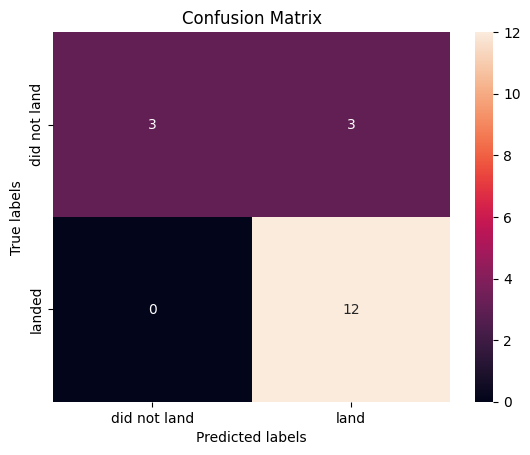

In [175]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
# Calculate the accuracy on the test data
accuracy_test = logreg_cv.score(X_test, Y_test)
print("Test set accuracy:", accuracy_test)
# Make predictions
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

c:\Users\Jerry Hunter\Desktop\mypython\Alpha\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jerry Hunter\Desktop\mypython\Alpha\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Jerry Hunter\Desktop\mypython\Alpha\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Jerry Hunter\Desktop\mypython\Alpha\.venv\Lib\site-packages\sklearn\base.py", line 6

Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy: 0.875
Test set accuracy: 0.8333333333333334
Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy: 0.8482142857142858
Test set accuracy: 0.8333333333333334
Logistic Regression test set accuracy: 0.8333333333333334
SVM test set accuracy: 0.8333333333333334
Decision Tree test set accuracy: 0.8333333333333334
K-Nearest Neighbors test set accuracy: 0.8333333333333334
Best performing model: Logistic Regression


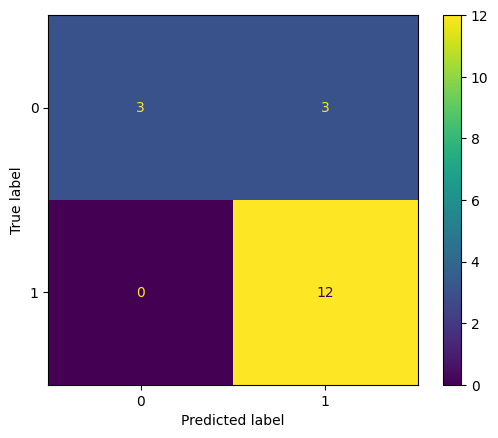

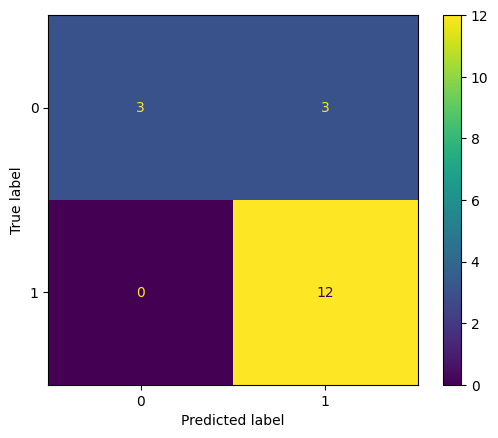

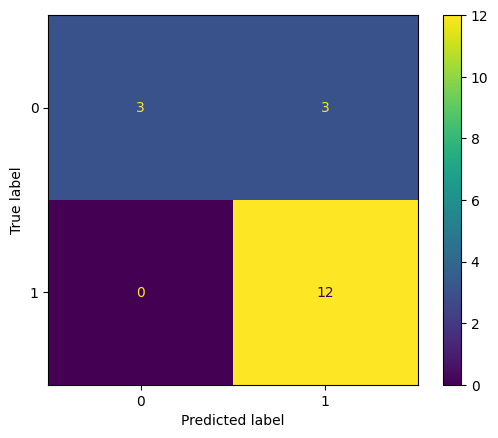

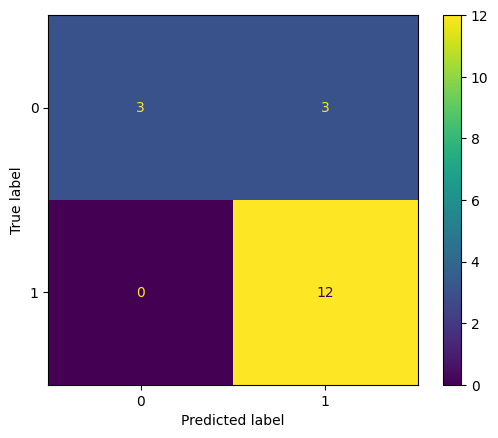

In [184]:
import requests
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Load dataset_part_2.csv
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response1 = requests.get(URL1)
data = pd.read_csv(io.BytesIO(response1.content))
print(data.head())

# Load dataset_part_3.csv
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response2 = requests.get(URL2)
X = pd.read_csv(io.BytesIO(response2.content))
print(X.head(100))

# Task 1: Create a NumPy array from the column Class in data
Y = data['Class'].to_numpy()
print(Y)

# Task 2: Standardize the data in X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
print(X.head())

# Task 3: Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}, Y_test shape: {Y_test.shape}")

# Task 4: Logistic Regression with GridSearchCV
parameters_lr = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters_lr, cv=10)
logreg_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)

# Task 5: Calculate the accuracy on the test data and plot the confusion matrix
yhat_lr = logreg_cv.predict(X_test)
accuracy_lr = logreg_cv.score(X_test, Y_test)
print("Test set accuracy:", accuracy_lr)

# Plot confusion matrix for logistic regression
ConfusionMatrixDisplay.from_estimator(logreg_cv, X_test, Y_test)

# Task 6: Support Vector Machine with GridSearchCV
parameters_svm = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': np.logspace(-3, 3, 5), 'gamma': np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
svm_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)

# Task 7: Calculate the accuracy on the test data and plot the confusion matrix
yhat_svm = svm_cv.predict(X_test)
accuracy_svm = svm_cv.score(X_test, Y_test)
print("Test set accuracy:", accuracy_svm)

# Plot confusion matrix for SVM
ConfusionMatrixDisplay.from_estimator(svm_cv, X_test, Y_test)

# Task 8: Decision Tree Classifier with GridSearchCV
parameters_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
tree_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)

# Task 9: Calculate the accuracy of tree_cv on the test data and plot the confusion matrix
yhat_tree = tree_cv.predict(X_test)
accuracy_tree = tree_cv.score(X_test, Y_test)
print("Test set accuracy:", accuracy_tree)

# Plot confusion matrix for Decision Tree
ConfusionMatrixDisplay.from_estimator(tree_cv, X_test, Y_test)

# Task 10: K-Nearest Neighbors with GridSearchCV
parameters_knn = {'n_neighbors': list(range(1, 11)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters_knn, cv=10)
knn_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)

# Task 11: Calculate the accuracy of knn_cv on the test data and plot the confusion matrix
yhat_knn = knn_cv.predict(X_test)
accuracy_knn = knn_cv.score(X_test, Y_test)
print("Test set accuracy:", accuracy_knn)

# Plot confusion matrix for KNN
ConfusionMatrixDisplay.from_estimator(knn_cv, X_test, Y_test)

# Task 12: Find the method that performs best
# Compare accuracy scores of all models
print("Logistic Regression test set accuracy:", accuracy_lr)
print("SVM test set accuracy:", accuracy_svm)
print("Decision Tree test set accuracy:", accuracy_tree)
print("K-Nearest Neighbors test set accuracy:", accuracy_knn)

# Determine the best model
best_model_name = max(
    ("Logistic Regression", accuracy_lr),
    ("SVM", accuracy_svm),
    ("Decision Tree", accuracy_tree),
    ("KNN", accuracy_knn),
    key=lambda item: item[1]
)[0]

print("Best performing model:", best_model_name)
